<a href="https://colab.research.google.com/github/joshnaviseelam/Automated-car-catalog-system-for-enhanced-showroom-management/blob/main/internship_6_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data with computed columns:
                       Title  Avg_RT_Score  Avg_Rating Rating_Tier
0                 Inception          89.0       48.90         Top
1           The Dark Knight          94.0       51.50         Top
2              Interstellar          78.5       43.55         Top
3                  Parasite          94.0       51.30         Top
4             The Godfather          97.5       53.35         Top
5              Pulp Fiction          94.0       51.45         Top
6                La La Land          79.0       43.50         Top
7  The Shawshank Redemption          94.5       51.90         Top
8              Forrest Gump          83.0       45.90         Top
9                The Matrix          86.5       47.60         Top 

Genre-wise aggregated stats:
       Genre  count  avg_imdb     avg_rt    avg_all
0    Action      1      9.00  94.000000  51.500000
1     Crime      2      9.05  95.750000  52.400000
2     Drama      2      9.05  88.750000  48.900000
3   Roman

/tmp/ipython-input-3489079589.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_stats, x='Genre', y='avg_all', palette='viridis')


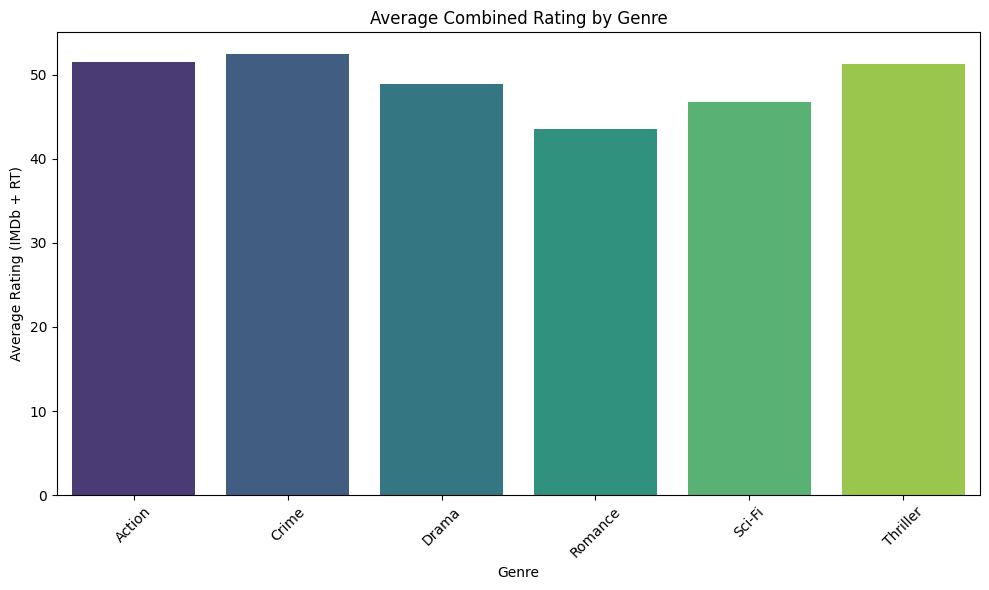

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# 1. Embed the dataset as a multi-line string
csv_data = """Title,Genre,Year,IMDb_Rating,RottenTomatoes_Critics,RottenTomatoes_Audience
Inception,Sci-Fi,2010,8.8,87,91
The Dark Knight,Action,2008,9.0,94,94
Interstellar,Sci-Fi,2014,8.6,72,85
Parasite,Thriller,2019,8.6,98,90
The Godfather,Crime,1972,9.2,98,97
Pulp Fiction,Crime,1994,8.9,92,96
La La Land,Romance,2016,8.0,91,67
The Shawshank Redemption,Drama,1994,9.3,91,98
Forrest Gump,Drama,1994,8.8,71,95
The Matrix,Sci-Fi,1999,8.7,88,85
"""

# 2. Read it into a DataFrame using StringIO
df = pd.read_csv(StringIO(csv_data))

# 3. Feature engineering: Compute average Rotten Tomatoes score
df['Avg_RT_Score'] = df[['RottenTomatoes_Critics', 'RottenTomatoes_Audience']].mean(axis=1)

# 4. Compute overall average rating (IMDb + RT average)
df['Avg_Rating'] = df[['IMDb_Rating', 'Avg_RT_Score']].mean(axis=1)

# 5. Add rating tiers
conditions = [
    df['Avg_Rating'] >= 9.0,
    df['Avg_Rating'] >= 8.5
]
choices = ['Top', 'Mid']
df['Rating_Tier'] = np.select(conditions, choices, default='Low')

# 6. Display results
print("Data with computed columns:\n", df[['Title', 'Avg_RT_Score', 'Avg_Rating', 'Rating_Tier']], "\n")

# 7. Aggregation: average rating by genre
genre_stats = df.groupby('Genre').agg(
    count=('Title', 'count'),
    avg_imdb=('IMDb_Rating', 'mean'),
    avg_rt=('Avg_RT_Score', 'mean'),
    avg_all=('Avg_Rating', 'mean')
).reset_index()

print("Genre-wise aggregated stats:\n", genre_stats, "\n")

# 8. Visualize average rating by genre
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_stats, x='Genre', y='avg_all', palette='viridis')
plt.title('Average Combined Rating by Genre')
plt.ylabel('Average Rating (IMDb + RT)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
print(df.head())


             Title     Genre  Year  IMDb_Rating  RottenTomatoes_Critics  \
0        Inception    Sci-Fi  2010          8.8                      87   
1  The Dark Knight    Action  2008          9.0                      94   
2     Interstellar    Sci-Fi  2014          8.6                      72   
3         Parasite  Thriller  2019          8.6                      98   
4    The Godfather     Crime  1972          9.2                      98   

   RottenTomatoes_Audience  Avg_RT_Score  Avg_Rating Rating_Tier  
0                       91          89.0       48.90         Top  
1                       94          94.0       51.50         Top  
2                       85          78.5       43.55         Top  
3                       90          94.0       51.30         Top  
4                       97          97.5       53.35         Top  


In [3]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    10 non-null     object 
 1   Genre                    10 non-null     object 
 2   Year                     10 non-null     int64  
 3   IMDb_Rating              10 non-null     float64
 4   RottenTomatoes_Critics   10 non-null     int64  
 5   RottenTomatoes_Audience  10 non-null     int64  
 6   Avg_RT_Score             10 non-null     float64
 7   Avg_Rating               10 non-null     float64
 8   Rating_Tier              10 non-null     object 
dtypes: float64(3), int64(3), object(3)
memory usage: 852.0+ bytes
None
Title                      0
Genre                      0
Year                       0
IMDb_Rating                0
RottenTomatoes_Critics     0
RottenTomatoes_Audience    0
Avg_RT_Score               0
Avg_Rating                 0
R

In [4]:
print(df.describe())


            Year  IMDb_Rating  RottenTomatoes_Critics  \
count    10.0000    10.000000                10.00000   
mean   2002.0000     8.790000                88.20000   
std      14.2595     0.363471                 9.51957   
min    1972.0000     8.000000                71.00000   
25%    1994.0000     8.625000                87.25000   
50%    2003.5000     8.800000                91.00000   
75%    2013.0000     8.975000                93.50000   
max    2019.0000     9.300000                98.00000   

       RottenTomatoes_Audience  Avg_RT_Score  Avg_Rating  
count                10.000000     10.000000   10.000000  
mean                 89.800000     89.000000   48.895000  
std                   9.247222      6.912147    3.594707  
min                  67.000000     78.500000   43.500000  
25%                  86.250000     83.875000   46.325000  
50%                  92.500000     91.500000   50.100000  
75%                  95.750000     94.000000   51.487500  
max           

In [5]:
print(df.sort_values('Avg_Rating', ascending=False))


                      Title     Genre  Year  IMDb_Rating  \
4             The Godfather     Crime  1972          9.2   
7  The Shawshank Redemption     Drama  1994          9.3   
1           The Dark Knight    Action  2008          9.0   
5              Pulp Fiction     Crime  1994          8.9   
3                  Parasite  Thriller  2019          8.6   
0                 Inception    Sci-Fi  2010          8.8   
9                The Matrix    Sci-Fi  1999          8.7   
8              Forrest Gump     Drama  1994          8.8   
2              Interstellar    Sci-Fi  2014          8.6   
6                La La Land   Romance  2016          8.0   

   RottenTomatoes_Critics  RottenTomatoes_Audience  Avg_RT_Score  Avg_Rating  \
4                      98                       97          97.5       53.35   
7                      91                       98          94.5       51.90   
1                      94                       94          94.0       51.50   
5                  

In [6]:
print(df.loc[df.groupby('Genre')['Avg_Rating'].idxmax()])


                      Title     Genre  Year  IMDb_Rating  \
1           The Dark Knight    Action  2008          9.0   
4             The Godfather     Crime  1972          9.2   
7  The Shawshank Redemption     Drama  1994          9.3   
6                La La Land   Romance  2016          8.0   
0                 Inception    Sci-Fi  2010          8.8   
3                  Parasite  Thriller  2019          8.6   

   RottenTomatoes_Critics  RottenTomatoes_Audience  Avg_RT_Score  Avg_Rating  \
1                      94                       94          94.0       51.50   
4                      98                       97          97.5       53.35   
7                      91                       98          94.5       51.90   
6                      91                       67          79.0       43.50   
0                      87                       91          89.0       48.90   
3                      98                       90          94.0       51.30   

  Rating_Tier  
1 

In [7]:
print(df['Rating_Tier'].value_counts())


Rating_Tier
Top    10
Name: count, dtype: int64


In [8]:
print(df.groupby('Genre')[['IMDb_Rating','Avg_RT_Score','Avg_Rating']].mean())


          IMDb_Rating  Avg_RT_Score  Avg_Rating
Genre                                          
Action           9.00     94.000000   51.500000
Crime            9.05     95.750000   52.400000
Drama            9.05     88.750000   48.900000
Romance          8.00     79.000000   43.500000
Sci-Fi           8.70     84.666667   46.683333
Thriller         8.60     94.000000   51.300000


In [9]:
print(df[(df['Year'] >= 2000) & (df['Year'] <= 2010)])


             Title   Genre  Year  IMDb_Rating  RottenTomatoes_Critics  \
0        Inception  Sci-Fi  2010          8.8                      87   
1  The Dark Knight  Action  2008          9.0                      94   

   RottenTomatoes_Audience  Avg_RT_Score  Avg_Rating Rating_Tier  
0                       91          89.0        48.9         Top  
1                       94          94.0        51.5         Top  


In [11]:
print(
    df.groupby('Genre').agg(
        count=('Title','count'),
        mean_avg_rating=('Avg_Rating','mean')
    )
)



          count  mean_avg_rating
Genre                           
Action        1        51.500000
Crime         2        52.400000
Drama         2        48.900000
Romance       1        43.500000
Sci-Fi        3        46.683333
Thriller      1        51.300000


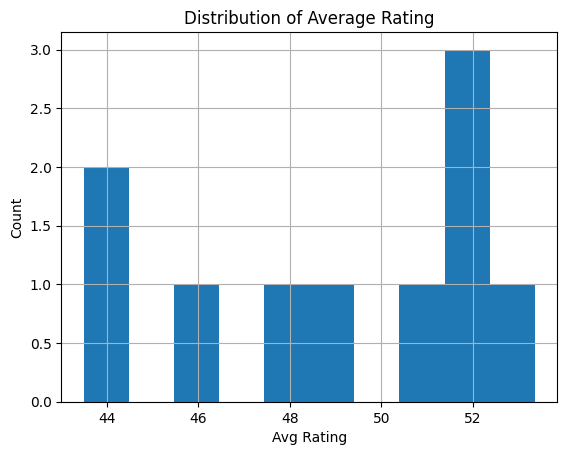

In [12]:
df['Avg_Rating'].hist(bins=10)
plt.title('Distribution of Average Rating')
plt.xlabel('Avg Rating')
plt.ylabel('Count')
plt.show()


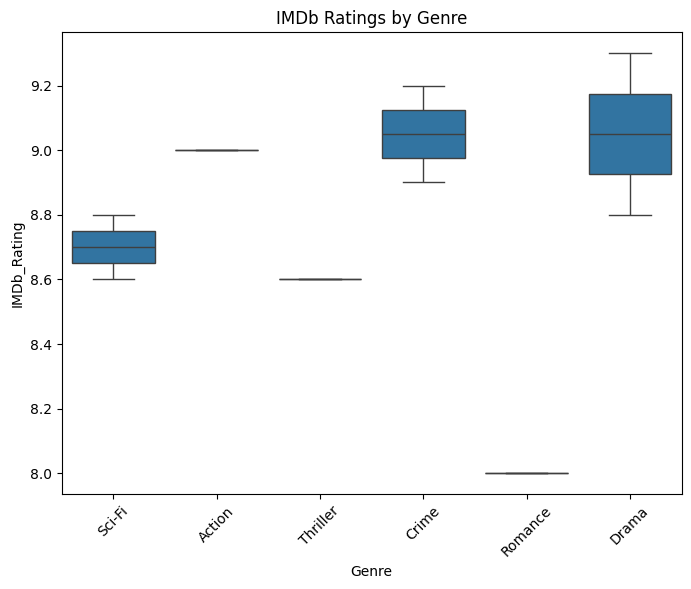

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Genre', y='IMDb_Rating')
plt.xticks(rotation=45)
plt.title('IMDb Ratings by Genre')
plt.show()


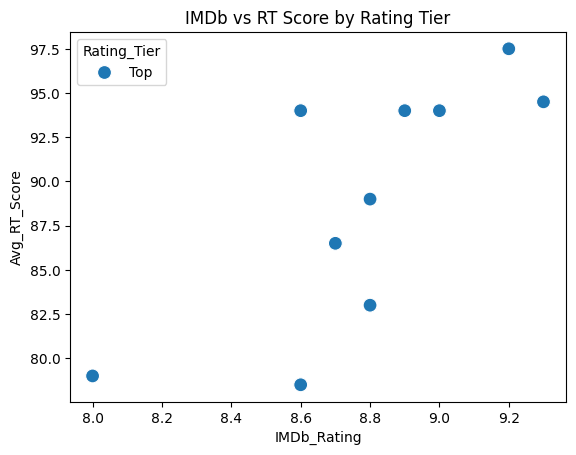

In [14]:
sns.scatterplot(data=df, x='IMDb_Rating', y='Avg_RT_Score', hue='Rating_Tier', s=100)
plt.title('IMDb vs RT Score by Rating Tier')
plt.show()


In [15]:
print(df[['IMDb_Rating','Avg_RT_Score']].corr())


              IMDb_Rating  Avg_RT_Score
IMDb_Rating      1.000000      0.751837
Avg_RT_Score     0.751837      1.000000


In [16]:
df['Decade'] = (df['Year'] // 10) * 10
pivot = df.pivot_table(values='Avg_Rating', index='Genre', columns='Decade', aggfunc='mean')
print(pivot)


Decade     1970   1990  2000    2010
Genre                               
Action      NaN    NaN  51.5     NaN
Crime     53.35  51.45   NaN     NaN
Drama       NaN  48.90   NaN     NaN
Romance     NaN    NaN   NaN  43.500
Sci-Fi      NaN  47.60   NaN  46.225
Thriller    NaN    NaN   NaN  51.300


In [17]:
threshold = df['Avg_Rating'].quantile(0.99)
print(df[df['Avg_Rating'] > threshold])


           Title  Genre  Year  IMDb_Rating  RottenTomatoes_Critics  \
4  The Godfather  Crime  1972          9.2                      98   

   RottenTomatoes_Audience  Avg_RT_Score  Avg_Rating Rating_Tier  Decade  
4                       97          97.5       53.35         Top    1970  


In [18]:
def imdb_category(x):
    return 'High' if x > 9 else 'Medium' if x > 8 else 'Low'
df['IMDB_Category'] = df['IMDb_Rating'].apply(imdb_category)
print(df[['Title','IMDB_Category']])


                      Title IMDB_Category
0                 Inception        Medium
1           The Dark Knight        Medium
2              Interstellar        Medium
3                  Parasite        Medium
4             The Godfather          High
5              Pulp Fiction        Medium
6                La La Land           Low
7  The Shawshank Redemption          High
8              Forrest Gump        Medium
9                The Matrix        Medium


In [19]:
print(df.groupby('Genre').nth(1))


          Title   Genre  Year  IMDb_Rating  RottenTomatoes_Critics  \
2  Interstellar  Sci-Fi  2014          8.6                      72   
5  Pulp Fiction   Crime  1994          8.9                      92   
8  Forrest Gump   Drama  1994          8.8                      71   

   RottenTomatoes_Audience  Avg_RT_Score  Avg_Rating Rating_Tier  Decade  \
2                       85          78.5       43.55         Top    2010   
5                       96          94.0       51.45         Top    1990   
8                       95          83.0       45.90         Top    1990   

  IMDB_Category  
2        Medium  
5        Medium  
8        Medium  


In [20]:
df['Is_High_Rated'] = df['Avg_Rating'] >= 9
print(df[['Title','Is_High_Rated']])


                      Title  Is_High_Rated
0                 Inception           True
1           The Dark Knight           True
2              Interstellar           True
3                  Parasite           True
4             The Godfather           True
5              Pulp Fiction           True
6                La La Land           True
7  The Shawshank Redemption           True
8              Forrest Gump           True
9                The Matrix           True
